In [1]:
%matplotlib inline

# Computational Graphs (Basics)

## What is a computational graph?

Computational graph is a graphical representation of numerical computations. The mathematical operations are captured as nodes. The data flowing as input and output of the nodes is represented by the edges connecting them. 

## Why computational graphs?

Computational graphs provide a way to *define* the computations that need to be done. They are like a visual programming language (declarative language). Once the computation is described, the libraries like Tensorflow and Theano, can execute them depending on the device configurations where the computation is executed. Thus once defined the computation can be run on CPUs, a distributed network of CPUs, GPUs, mobile phones etc.

## Computational graph in Tensorflow

In Tensorflow, you can use Python language to programmatically build a computational graph. Inputs for the graph are defined as placeholders and they are supplied at the time of executing the computations. To compute on the graph, a Tensorflow session is created and input data is provided. If you execute the run and provide the nodes whose values you seek as output. Tensorflow finds all *dependent* computation nodes necessary to compute the values of output nodes, and executes the computation only for the necessary paths. 

We will see in later sessions how more advanced computing is done in the context of neural networks, and also understand how Tensorflow computational graph provides automatic differentiation, necessary for learning algorithms like backpropagation.

In [2]:
from graphviz import Digraph
from IPython.core.display import display, SVG

def tf_to_dot(graph):
    dot = Digraph()

    for n in graph.as_graph_def().node:
        name = n.name.split('/')[0]
        dot.node(name, label=name)

        for src in n.input:
            src = src.split('/')[0]
            if src != name:
                dot.edge(src, name)
    display(SVG(dot._repr_svg_()))        
    return dot

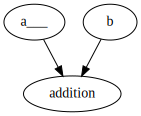

16.0


In [3]:
import tensorflow as tf

tf.reset_default_graph()

node_a = tf.placeholder(dtype=tf.float32,name="a___")
node_b = tf.constant(6.0,dtype=tf.float32, name="b")

adder_node = tf.add(node_a,node_b, name="addition")


sess = tf.Session()
output = sess.run(adder_node,{node_a:10.0})
tf_to_dot(tf.get_default_graph())
sess.close()

print output

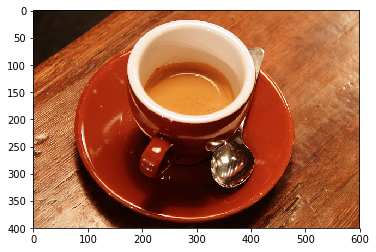

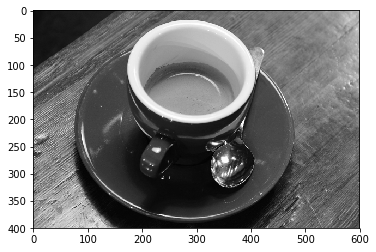

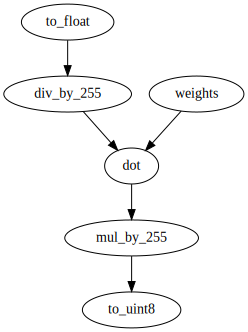

In [8]:
from skimage import data as imgdata
import skimage.color as color
import matplotlib.pyplot as plt
import scipy.ndimage as ndimage
import numpy as np

coffee_cup = imgdata.coffee()
plt.imshow(coffee_cup)
plt.show()

def to_gray(img):
    #img = tf.placeholder(tf.uint8,name="input____")
    img_float = tf.div(tf.cast(img,dtype=tf.float64,name="to_float"),255.0,name='div_by_255')
    weights = tf.constant([0.2125,0.7154,0.0721],dtype=tf.float64,name="weights")
    
#     R = tf.slice(img_float,[0,0,0],[-1,-1,1],name='extract_red')
#     G = tf.slice(img_float,[0,0,1],[-1,-1,1],name='extract_green')
#     B = tf.slice(img_float,[0,0,2],[-1,-1,1],name='extract_blue')
    
    
#     gray = 0.2125*R + 0.7154*G + 0.0721*B
    gray = tf.tensordot(img_float,weights,axes=1,name="dot")
#     weighted = tf.multiply(img_float,weights,name="weighting")
#     gray = tf.reduce_sum(weighted,axis=2, name ="weighted_sum") 
    
    output = tf.cast(tf.multiply(gray,255.0,name='mul_by_255'), tf.uint8, name="to_uint8")
    return output

tf.reset_default_graph()
gray_graph = to_gray(coffee_cup)
#gray_graph = to_gray(coffee_cup)

I = np.uint8(color.rgb2gray(coffee_cup)*255)

with tf.Session() as sess:
    gray_image = np.squeeze(sess.run(gray_graph))
#     print gray_image.shape
#     print I.shape
#     print np.max(gray_image),np.min(gray_image),np.mean(gray_image)
#     print np.max(I),np.min(I),np.mean(I)
#     print np.max(np.abs(gray_image-I))
    plt.imshow(np.squeeze(gray_image),'gray')
    plt.show()
dot=tf_to_dot(tf.get_default_graph())



    

In [3]:
%matplotlib inline
import tensorflow as tf
import skimage.data as imgdata
import matplotlib.pyplot as plt
import numpy as np

horse = imgdata.horse().astype(np.uint8)

def horse_color(img):
#     horse_idx = tf.constant(img.)
    horse = tf.constant(img.astype(bool),name='horse')
#     white = tf.constant(np.ones((img.shape[0],img.shape[1],3),dtype=np.float64)*255)
#     color = tf.constant(np.full((img.shape[0],img.shape[1],3),np.array([127.0,255.0,128.0]),dtype=np.float64))
#     white = tf.constant(np.zeros(img.shape,dtype=np.uint8))
#     color = tf.constant(np.ones(img.shape,dtype=np.uint8)*128)
    horse_idx = tf.where(horse)
#     colored_horse = tf.boolean_mask(color,horse)
#     zero = tf.constant(0, dtype=tf.uint8)
#     non_empty = tf.not_equal(horse, zero,name='horse_nonempty')
#     unit8_nonempty_horse = tf.cast(tf.not_equal(horse, zero,name='horse_nonempty'),dtype=tf.uint8,name="to_uint8")
    return horse_idx

tf.reset_default_graph()
horse_data =  imgdata.horse()
horse_graph = horse_color(horse_data)

with tf.Session() as sess:
    horse_image = sess.run(horse_graph)
    print horse_image,horse_data
#     plt.imshow(horse_image)
#     plt.show()
# dot=tf_to_dot(tf.get_default_graph())


[[  0   0]
 [  0   1]
 [  0   2]
 ..., 
 [327 397]
 [327 398]
 [327 399]] [[ True  True  True ...,  True  True  True]
 [ True  True  True ...,  True  True  True]
 [ True  True  True ...,  True  True  True]
 ..., 
 [ True  True  True ...,  True  True  True]
 [ True  True  True ...,  True  True  True]
 [ True  True  True ...,  True  True  True]]


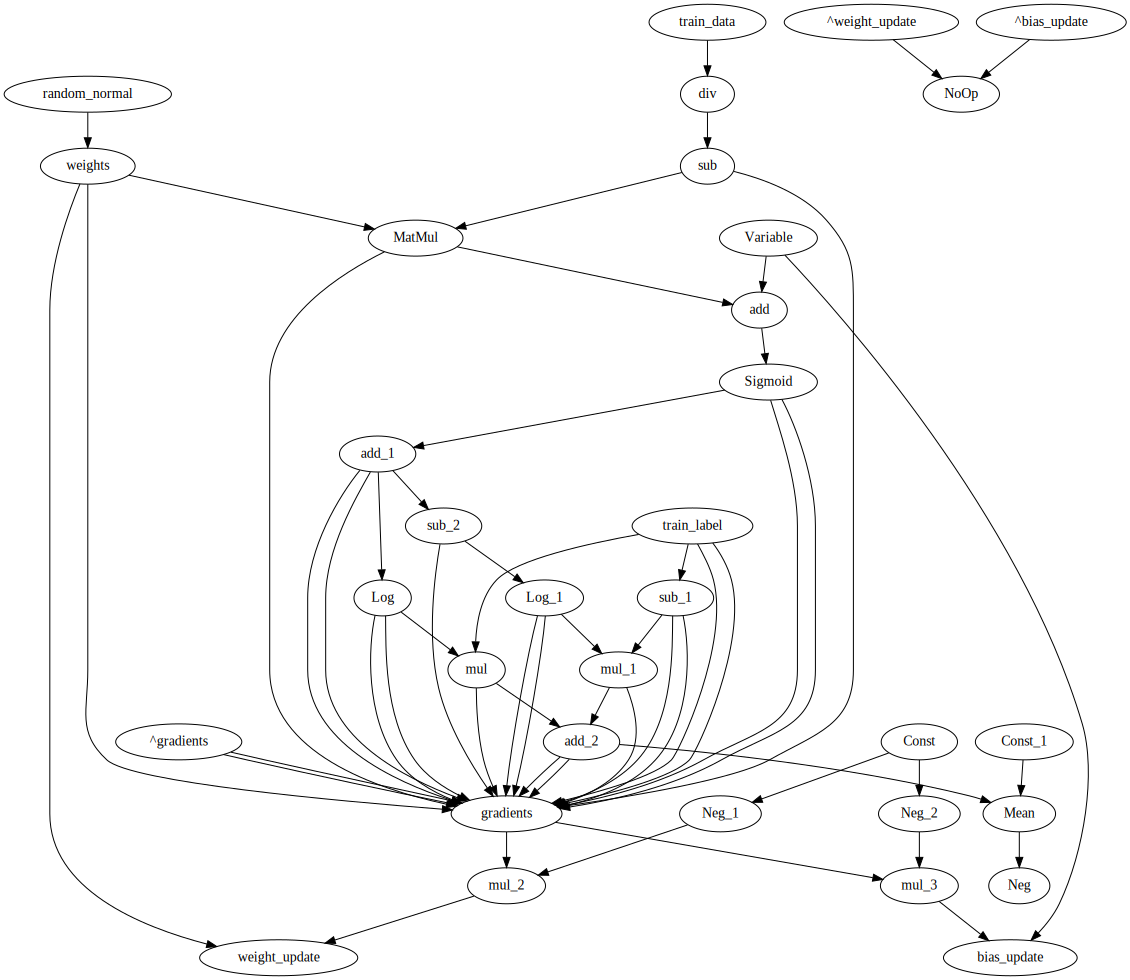

Training loss after 0 iterations: 0.693686
Training loss after 100 iterations: 0.342306
Training loss after 200 iterations: 0.210373
Training loss after 300 iterations: 0.174988
Training loss after 400 iterations: 0.152505
Training loss after 500 iterations: 0.136287
Training loss after 600 iterations: 0.123976
Training loss after 700 iterations: 0.114264
Training loss after 800 iterations: 0.106370
Training loss after 900 iterations: 0.099801
Training loss after 1000 iterations: 0.094227
Training loss after 1100 iterations: 0.089424
Training loss after 1200 iterations: 0.085229
Training loss after 1300 iterations: 0.081525
Training loss after 1400 iterations: 0.078224
Training loss after 1500 iterations: 0.075257
Training loss after 1600 iterations: 0.072572
Training loss after 1700 iterations: 0.070125
Training loss after 1800 iterations: 0.067885
Training loss after 1900 iterations: 0.065823
Accuracy of the model is  0.93


In [1]:
%matplotlib inline
from graphviz import Digraph
from IPython.core.display import display, SVG

def tf_to_dot(graph):
    dot = Digraph()

    for n in graph.as_graph_def().node:
        name = n.name.split('/')[0]
        dot.node(name, label=name)

        for src in n.input:
            src = src.split('/')[0]
            if src != name:
                dot.edge(src, name)
    display(SVG(dot._repr_svg_()))
    return dot

import numpy as np
import scipy.io
import matplotlib.pyplot as plt
import tensorflow as tf

mat = scipy.io.loadmat('./FaceNonFace.mat')

faces = np.rollaxis(mat["face"].astype(np.uint8),-1,0)
non_faces = np.rollaxis(mat["nonFace"].astype(np.uint8),-1,0)

rand_idx = np.arange(0,faces.shape[0])
np.random.shuffle(rand_idx)

train_test_split = 0.8

face_split = np.int(train_test_split*faces.shape[0])

train_faces = faces[rand_idx[:face_split]]
test_faces = faces[rand_idx[face_split:]]

non_face_split = np.int(train_test_split*non_faces.shape[0])
train_non_faces = non_faces[rand_idx[:non_face_split]]
test_non_faces = non_faces[rand_idx[non_face_split:]]

train_data = np.vstack([train_faces,train_non_faces])
train_labels = np.array([0]*len(train_faces)+[1]*len(train_non_faces)).astype(np.float32).reshape(-1,1)

test_data = np.vstack([test_faces,test_non_faces])
test_labels = np.array([0]*len(test_faces)+[1]*len(test_non_faces)).astype(np.float32).reshape(-1,1)

train_data = train_data.reshape(train_data.shape[0],-1).astype(np.float32)
test_data = test_data.reshape(test_data.shape[0],-1).astype(np.float32)

# plt.imshow((train_data[1000].reshape(60,60,3)*255).astype(np.float32))
# plt.show()

# tf.reset_default_graph()
def build_graph():
    g = tf.Graph()
    with g.as_default():
        train_x = tf.placeholder(shape=[None,train_data.shape[1]],name="train_data",dtype=np.float32)
        train_y = tf.placeholder(shape=[None,1],name="train_label",dtype=np.float32)


        train_x1 = tf.div(train_x,255.0)-0.5

        learning_rate = tf.constant(0.05)

        weights = tf.Variable(tf.random_normal([train_data.shape[1],1],stddev=1e-3),name="weights")
        bias = tf.Variable(0.1,dtype=np.float32)

        h = tf.matmul(train_x1,weights)+bias
        z = tf.sigmoid(h)+1e-6

        loss = -tf.reduce_mean(train_y*tf.log(z) + (1-train_y)*tf.log(1-z))
        dw,db = tf.gradients(loss,[weights,bias])

        weights_update = tf.assign_add(weights,-learning_rate*dw,name='weight_update')
        bias_update = tf.assign_add(bias,-learning_rate*db,name='bias_update')

        with tf.control_dependencies([weights_update,bias_update]):
            train_op = tf.no_op()
        tf_to_dot(g)
        return (g,loss,train_op,train_x,train_y,z)

(g,loss,train_op,train_x,train_y,z) = build_graph()

with g.as_default():
    with tf.Session() as sess:
        sess.run(tf.global_variables_initializer())
        for i in xrange(2000):
            l,_ = sess.run([loss,train_op],feed_dict={train_x:train_data,train_y:train_labels})
            if i%100 == 0:
                print 'Training loss after %d iterations: %f'%(i,l)

        y_ = sess.run(z,feed_dict = {train_x:test_data})
        y_ = y_ > 0.5
        accuracy = np.sum((y_ == (test_labels > 0)),0)[0]/(y_.shape[0]*1.0)
        print 'Accuracy of the model is ',accuracy
